## ICP04 Assignment

### 1.0 Set Up



In [12]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

# set random seed to ensure that results are repeatable
np.random.seed(1)

### 2.0 Loading Data

In [31]:
# load data
X_train = pd.read_csv('D:/BAIS/2nd Sem/DSP/data/airbnb_train_X_price_gte_150.csv') 
y_train = pd.read_csv('D:/BAIS/2nd Sem/DSP/data/airbnb_train_y_price_gte_150.csv') 
X_test = pd.read_csv('D:/BAIS/2nd Sem/DSP/data/airbnb_test_X_price_gte_150.csv') 
y_test = pd.read_csv('D:/BAIS/2nd Sem/DSP/data/airbnb_test_y_price_gte_150.csv')


## 3.0 Model the data
First, we will create a dataframe to hold all the results of our models.

In [32]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

### 3.1 Fit a SVM classification model using polynomial kernal with Random Search Approach

In [24]:
score_measure = "precision"
kfolds = 5

param_rand = {
    'C': np.arange(5,15),
    'degree': [3,4,5],
    'gamma': ['scale', 'auto'],
    'coef0': np.arange(1,5)
}

svm_poly_model = SVC(kernel="poly")
rand_search = RandomizedSearchCV(estimator = svm_poly_model, param_distributions=param_rand, cv=kfolds, n_iter=20,
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = rand_search.fit(X_train,np.ravel(y_train))

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

best_SVM_poly = rand_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best precision score is 0.8524973031907106
... with parameters: {'gamma': 'auto', 'degree': 4, 'coef0': 1, 'C': 14}


In [25]:
model_preds = rand_search.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"poly svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 3.2 Fit a Decision Tree classification model with Randomized Search Approach

In [33]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(2,70),  
    'min_samples_leaf': np.arange(2,70),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 200), 
    'max_depth': np.arange(1,50), 
    'criterion': ['entropy', 'gini'],
    
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=0, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, np.ravel(y_train))

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

best_DTree = rand_search.best_estimator_

The best precision score is 0.8553701168468061
... with parameters: {'min_samples_split': 6, 'min_samples_leaf': 24, 'min_impurity_decrease': 0.0021, 'max_leaf_nodes': 46, 'max_depth': 9, 'criterion': 'gini'}


In [34]:
c_matrix = confusion_matrix(y_test, rand_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Decision Tree Random Search", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.3f} Precision={TP/(TP+FP):.3f} Recall={TP/(TP+FN):.3f} F1={2*TP/(2*TP+FP+FN):.3f}")

Accuracy=0.847 Precision=0.833 Recall=0.866 F1=0.849


## 4.0 Diagrams of DTrees

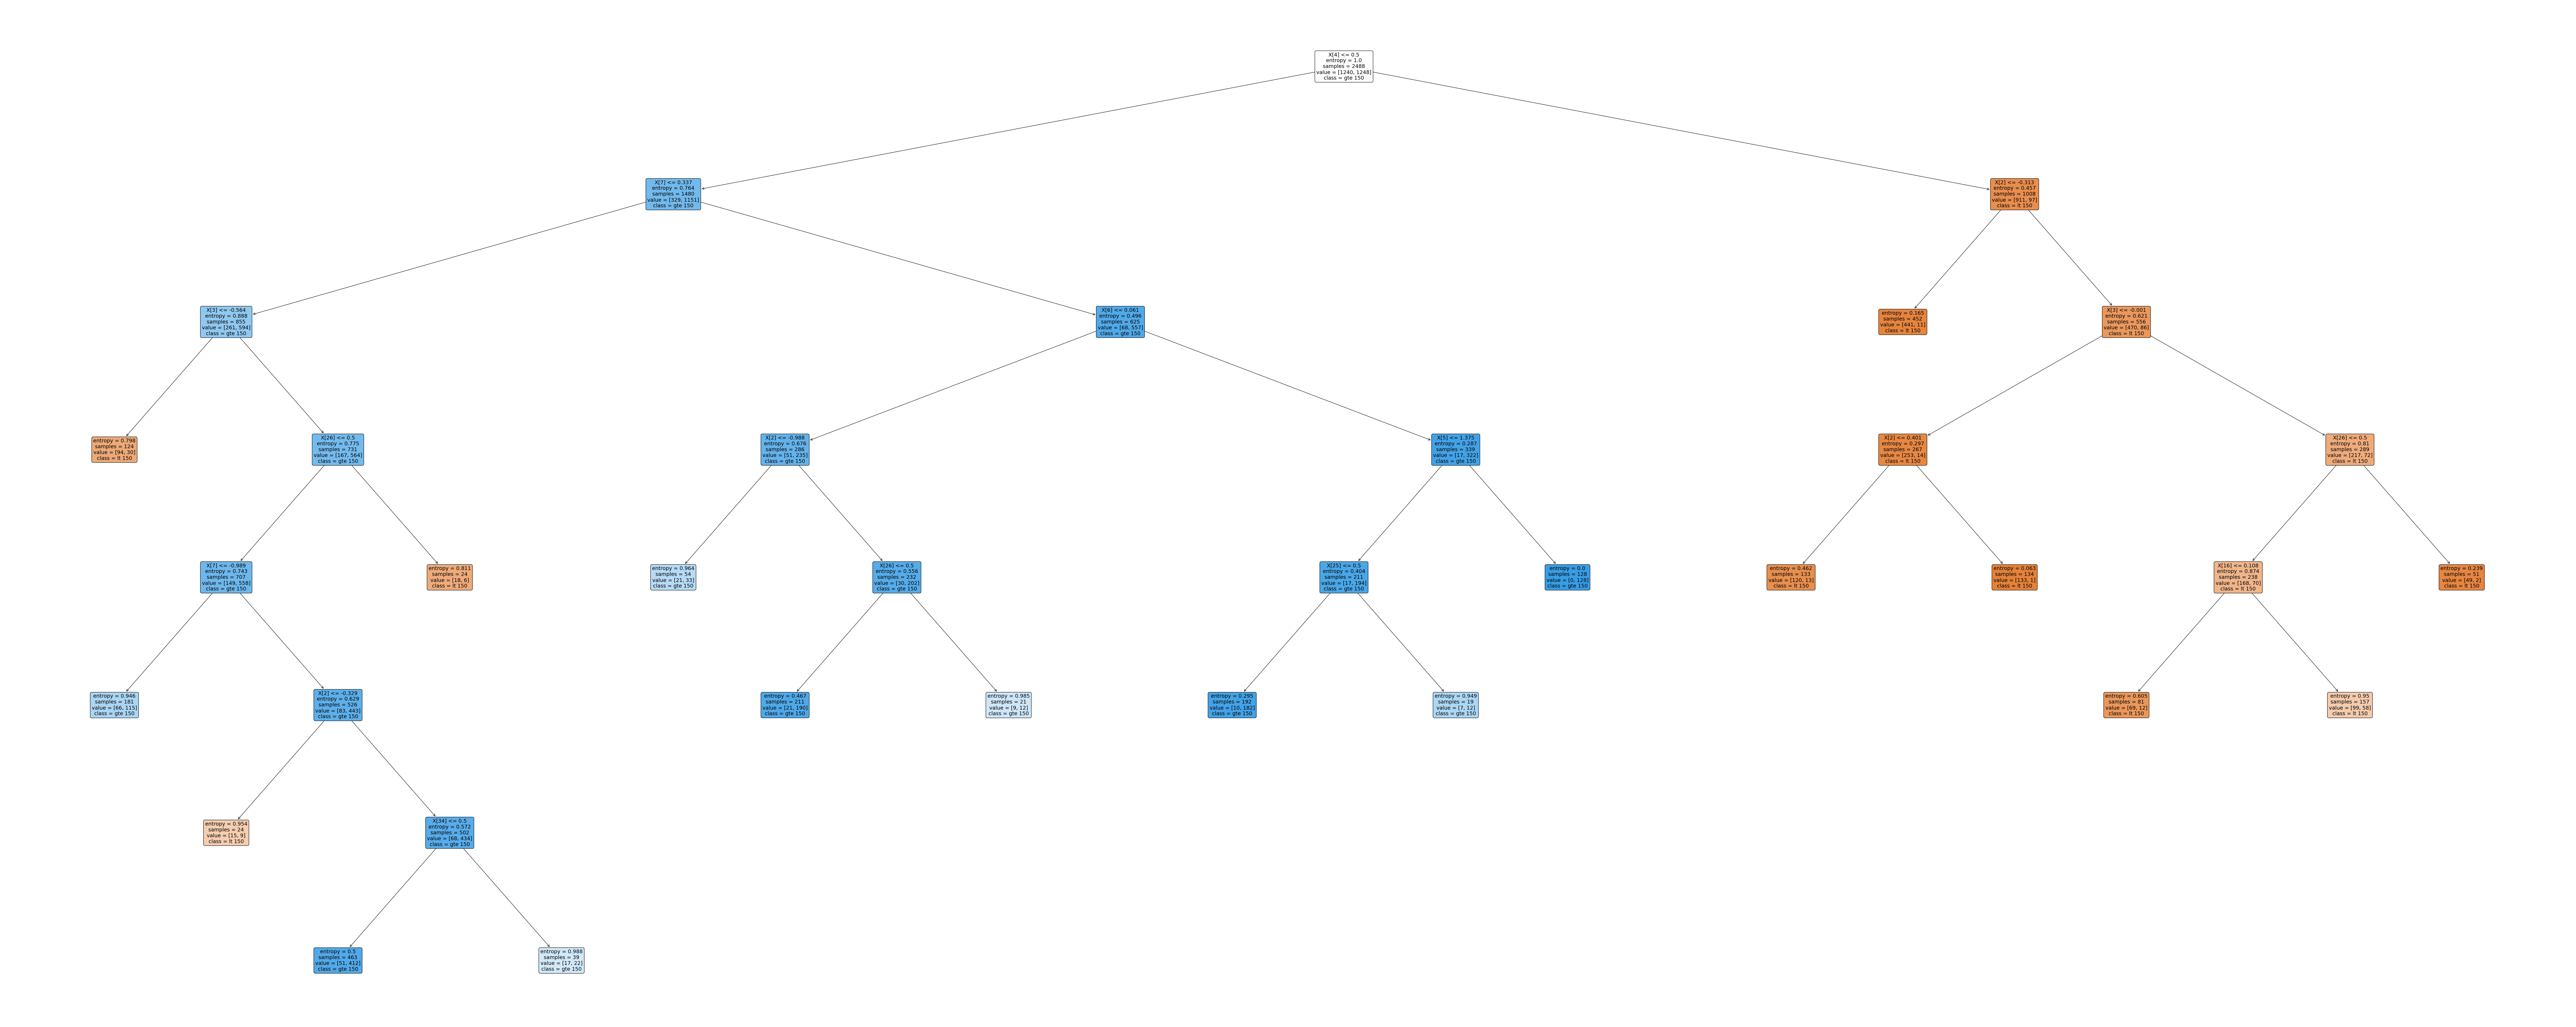

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(best_DTree, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

## 5.0 Summary

In [30]:
performance.sort_values(by=['Precision'])

,model,Accuracy,Precision,Recall,F1
0,Decision Tree Random Search,0.846298,0.837937,0.856874,0.84730
0,poly svm,0.861293,0.845045,0.883239,0.86372


# 6.0 Analysis

After analysing the above summary, we can say that SVM poly kernel with random search approach turns out to be the best model since accuracy, precision, recall and, f1 score is higher for SVM poly model than Decision Tree Model. 
Accuracy for SVM Poly is 0.861293 while for Decision Tree it is 0.846298.
Similarly, precision for for SVM poly is 0.845045 while for Decision Tree it is 0.837937.
Recall for SVM Poly is 0.883239 while for Decision Tree it is 0.856874.
F1 Score for SVM Poly is 0.86372 and for Decision Tree is 0.84730.
All the paramters are better for SVM poly model comparatively. Hence, SVM poly kernel model is best model for us out of the given choices.
